# Outline of the session. What will we learn?

# Astropy Main ingredients

In [27]:
import numpy as np
from astropy import units as u

In [28]:
a = 42.0 * u.meter  
a

<Quantity 42. m>

In [29]:
type(a)

astropy.units.quantity.Quantity

In [30]:
print(a.value)
print(a.unit)

42.0
m


In [34]:
b = [30,60,90]*u.deg
b

<Quantity [30., 60., 90.] deg>

In [39]:
c = np.arange(10)*u.h
c

<Quantity [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] h>

### Operations with Quantities

In [33]:
a + 15*u.cm

<Quantity 42.15 m>

In [38]:
b + 15*u.arcmin

<Quantity [30.25, 60.25, 90.25] deg>

In [40]:
c + 525*u.second

<Quantity [0.14583333, 1.14583333, 2.14583333, 3.14583333, 4.14583333,
           5.14583333, 6.14583333, 7.14583333, 8.14583333, 9.14583333] h>

### Unit conversion and operations

In [41]:
a.to('km')

<Quantity 0.042 km>

In [44]:
b.to('milliarcsecond')

<Quantity [1.08e+08, 2.16e+08, 3.24e+08] marcsec>

In [49]:
100*u.km/(c + 1*u.min)

<Quantity [6000.        ,   98.36065574,   49.58677686,   33.14917127,
             24.89626556,   19.93355482,   16.62049861,   14.25178147,
             12.47401247,   11.09057301] km / h>

In [64]:
v = 100 * u.meter / u.second
v

<Quantity 100. m / s>

In [70]:
v.to(u.km/u.day)

<Quantity 8640. km / d>

In [65]:
v.to(u.pc/u.yr)

<Quantity 1.02271217e-07 pc / yr>

### Other operations

In [53]:
np.mean(c)

<Quantity 4.5 h>

In [92]:
r = np.random.randn(4,4)*u.cm
print(r)
np.min(r).to('m')

[[ 0.04745291 -1.25146544 -1.31329613  0.65306665]
 [-0.62545103 -1.18820465 -0.64277425  0.16566763]
 [-0.67805698  1.51824875 -1.30283015  1.15929447]
 [-0.3784737   0.53651648  0.55786936 -1.34091382]] cm


<Quantity -0.01340914 m>

In [10]:
Emin = 100*u.keV
Emin

<Quantity 100. keV>

In [11]:
Emax = 10*u.MeV
Emax

<Quantity 10. MeV>

In [12]:
Emax/Emin

<Quantity 0.1 MeV / keV>

In [13]:
np.log(Emax/Emin)

<Quantity 4.60517019>

An alternative way to create a `Quantity` object, which is much faster for large datasets

In [ ]:
x = u.Quantity(np.arange(10), unit='m')
x

### ⛏ Exercise
?? Something simple to warm up

### Physical constants

In [71]:
from astropy import constants as const
# speed of light
speed_of_light = const.c
speed_of_light

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [75]:
const.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [76]:
const.M_sun.to('g')

<Quantity 1.98840987e+33 g>

In [77]:
# distance sun - earth
distance_sun = 1 * u.au

# time
time_sun = distance_sun / speed_of_light
time_sun

<Quantity 3.33564095e-09 AU s / m>

In [78]:
time_sun.to('min')

<Quantity 8.3167464 min>

In [79]:
print(f"SI: {distance_sun.si}")
print(f"CGS: {distance_sun.cgs}")

SI: 149597870700.0 m
CGS: 14959787070000.0 cm


### ⛏ Exercise
Assuming that the distance to the Galactic Center is 8 kpc, compute the time it takes for light to travel from the Galactic Center to the Earth, in years.

In [80]:
# distance to GC
distance_gc = 8 * u.kpc

# time
time_gc = distance_gc / speed_of_light
time_gc.to(u.yr)

<Quantity 26092.51021734 yr>

# Astropy Coordinates

In [96]:
from astropy.coordinates import Angle

Angle(24*u.deg)

<Angle 24. deg>

In [97]:
a = Angle(1*u.deg)
print(a.deg)
print(a.arcmin)
print(a.arcsec)

1.0
60.0
3600.0


In [98]:
angles = Angle([1, 4, 6, 15, -3, 2, 10, 2, 0]*u.deg)
angles

<Angle [ 1.,  4.,  6., 15., -3.,  2., 10.,  2.,  0.] deg>

In [99]:
angles.to('arcmin')

<Angle [  60.,  240.,  360.,  900., -180.,  120.,  600.,  120.,    0.] arcmin>

In [100]:
angles.sort()
angles.arcmin

array([-180.,    0.,   60.,  120.,  120.,  240.,  360.,  600.,  900.])

In [101]:
angles.sum()

<Angle 37. deg>

Let's work with coordinates

In [102]:
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

Multiple ways to initialize the coordinates

In [105]:
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

The coordinates can be accessed by R.A. or Declination, and can be converted to different units.

In [110]:
print(c.ra.arcmin)
print(c.dec.arcsec)
print(c.ra.radian)
print(c.ra.hms)
print(c.dec.dms)

637.5
148320.0
0.18544123302439752
hms_tuple(h=0.0, m=42.0, s=30.000000000000426)
dms_tuple(d=41.0, m=12.0, s=1.0231815394945443e-11)


It also accespts arrays

In [111]:
cs = SkyCoord(np.random.uniform(0, 180, 100)*u.deg, np.random.uniform(-90, 90, 100)*u.deg, frame='icrs')
cs

<SkyCoord (ICRS): (ra, dec) in deg
    [( 15.11192675, -80.26735846), (121.00153289,  -4.97608732),
     (179.85575368, -37.39490622), (111.80706945, -10.74644003),
     ( 91.15513569, -56.2772105 ), (135.54764263, -52.73346767),
     (160.37919325,  63.9992152 ), ( 24.7718069 ,  84.94497903),
     (109.68347425, -24.56724863), ( 71.98151063,  44.92556309),
     ( 47.45767352,  80.90033281), ( 52.324941  , -43.06876987),
     ( 87.71098454, -32.89044007), (179.20825727, -58.80634729),
     ( 23.19134185,  19.49109633), ( 45.75260463,  72.15790399),
     ( 54.33084246,  14.27295191), ( 69.87244225,  58.50721043),
     ( 63.92190108, -41.56554482), (169.12841105,  -4.99987368),
     ( 42.8521878 ,  32.55105101), ( 38.03154683, -25.20361285),
     ( 98.35419341,  64.22509629), (150.10539323,  54.5024416 ),
     ( 61.11103044, -14.23718908), ( 67.56208975, -35.37242478),
     ( 39.47297312, -71.657625  ), ( 42.07262714,  21.58942597),
     (143.86255996,   3.6032882 ), (106.29478872, -67.0

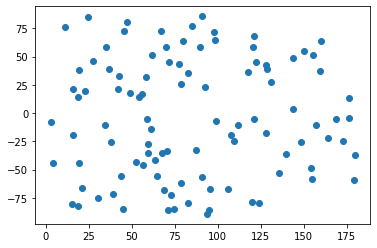

In [112]:
import matplotlib.pyplot as plt
plt.plot(cs.ra, cs.dec, 'o')

Coordinate transformation

In [113]:
c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
c_icrs.galactic  

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>

Distance between two coordinates

In [114]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, frame='fk5')
c1.separation(c2)  # Differing frames handled correctly  

<Angle 1.40453359 deg>

Search coordinates by source name

In [116]:
SkyCoord.from_name("PSR J1012+5307")

<SkyCoord (ICRS): (ra, dec) in deg
    (153.1393106, 53.1173746)>

### ⛏ Exercise
Find the separation in arcmin between M51 and the point of the Sky in Galactic Coordinates l=10h25m47.0s and b=+10deg. Be careful setting the coordinate frame of reference.

In [117]:
m51_coord = SkyCoord.from_name("M51")  
point_coord = SkyCoord(l='10h25m47.0s', b=10*u.degree, frame='galactic')
m51_coord, point_coord
print(m51_coord.separation(point_coord).to('arcmin'))

4040.44arcmin


# Vizier Queries
https://ioa-coding.github.io/codecorners/2017_10_24_CC02_astroquery.html  
https://astroquery.readthedocs.io/en/latest/vizier/vizier.html

## Table Discover

In [118]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('carmenes dwarf')
['{}: {}'.format(k, v.description) for k, v in catalog_list.items()]

['J/A+A/577/A128: CARMENES input catalogue of M dwarfs. I (Alonso-Floriano+, 2015)',
 'J/A+A/597/A47: CARMENES input catalogue of M dwarfs II (Cortes-Contreras+ 2017)',
 'J/A+A/609/A117: CARMENES radial velocity curves of 7 M-dwarf (Trifonov+, 2018)',
 'J/A+A/609/L5: HD147379 b velocity curve (Reiners+, 2018)',
 'J/A+A/612/A49: 324 CARMENES M dwarfs velocities (Reiners+, 2018)',
 'J/A+A/614/A76: CARMENES input catalogue of M dwarfs. III. (Jeffers+, 2018)',
 'J/A+A/614/A122: Radial-velocity of CARMENES M dwarfs (Tal-Or+, 2018)',
 'J/A+A/615/A6: Photospheric parameters of CARMENES stars (Passegger+, 2018)',
 'J/A+A/618/A115: HD 147379 radial velocities (Kaminski+, 2018)',
 'J/A+A/619/A32: CARMENES SB2 orbital parameters (Baroch+, 2018)',
 'J/A+A/620/A171: Radial velocities of GJ 3779 and GJ 1265 (Luque+, 2018)',
 'J/A+A/621/A126: CARMENES input catalogue of M dwarfs. IV. (Diez Alonso+ 2019)',
 'J/A+A/622/A153: GJ 4276 radial velocity curve (Nagel+, 2019)',
 'J/A+A/623/A44: CARMENES M-dwa

In [119]:
Vizier.ROW_LIMIT = -1
cat = Vizier.get_catalogs('J/A+A/612/A49')[0]

In [120]:
cat

Seq,ID,GJ,Name,SpType,Jmag,Mass,RV,Per,r_Per,l_vsini,vsini,l_Pvsini,Pvsini,l_i,i,logLHa_Lbol,SimbadName,_RA,_DE
,,,,,mag,Msun,km / s,d,,,km / s,,d,,deg,[-],,deg,deg
int16,str11,str6,str23,str4,float32,float32,float64,float32,str6,str1,float32,str1,float32,str2,int16,float32,str23,float64,float64
1,J00051+457,2,GJ 2,M1.0,6.70,0.56,-0.392,--,,<,2.0,>,13.30,,--,--,GJ 2,1.29537,45.78657
2,J00067-075,1002,GJ 1002,M5.5,8.32,0.11,-40.058,--,,<,2.0,>,3.50,,--,-4.83,GJ 1002,1.67999,-7.53806
3,J00162+198E,1006B,LP 404-062,M4.0,8.89,0.30,-1.457,104.00,Irw11,<,2.0,>,7.40,<=,90,--,LP 404-062,4.06730,19.86402
4,J00183+440,15A,GX And,M1.0,5.25,0.45,11.671,--,,<,2.0,>,10.50,,--,--,GX And,4.59535,44.02295
5,J00184+440,15B,GQ And,M3.5,6.79,0.16,10.876,--,,<,2.0,>,4.60,,--,--,GQ And,4.60760,44.02725
6,J00286-066,1012,GJ 1012,M4.0,8.04,0.39,-12.531,--,,<,2.0,>,9.10,,--,--,GJ 1012,7.16444,-6.66366
7,J00389+306,26,Wolf 1056,M2.5,7.45,0.47,-0.499,--,,<,2.0,>,11.10,,--,--,Wolf 1056,9.74602,30.61622
8,J00570+450,,G 172-030,M3.0,8.10,0.39,6.396,--,,<,2.0,>,9.30,,--,--,G 172-030,14.26122,45.08605


In [121]:
cat.info()

<Table length=324>
    name     dtype   unit   format                             description                             n_bad
----------- ------- ------ ------- ------------------------------------------------------------------- -----
        Seq   int16                                                                  Sequential number     0
         ID   str11                                                                   ID (JHHMMm+DDmA)     0
         GJ    str6                                                                            GJ name     0
       Name   str23                                                                               Name     0
     SpType    str4                                                                   MK spectral type     0
       Jmag float32    mag {:5.2f}                                                         J magnitude     0
       Mass float32   Msun {:5.2f}                                                                Mass     0


In [122]:
cat.info('stats')

<Table length=324>
    name      mean     std      min      max   n_bad
----------- -------- -------- -------- ------- -----
        Seq    162.5  93.5303        1     324     0
         ID       --       --       --      --     0
         GJ       --       --       --      --     0
       Name       --       --       --      --     0
     SpType       --       --       --      --     0
       Jmag  7.81867  1.18761      4.2   11.35     0
       Mass 0.369877 0.168519     0.07    0.74     0
         RV -3.34948  31.2111 -120.236 105.798     0
        Per  41.0267  46.5482     0.27   165.1   261
      r_Per       --       --       --      --     0
    l_vsini       --       --       --      --     0
      vsini  4.56543  8.11359        2    59.8     0
   l_Pvsini       --       --       --      --     0
     Pvsini  8.02358  4.34176     0.09    16.1     0
        l_i       --       --       --      --     0
          i  80.4531  18.7316       18      90   260
logLHa_Lbol -4.03627 0.4190

### ⛏ Exercise
Get the coordinates from catalog from XXX paper.

## Query a Simbad object

In [123]:
from astroquery.vizier import Vizier
result = Vizier.query_object("NGC 6670")
print(result)

TableList with 200 tables:
	'0:I/252/out' with 8 column(s) and 32 row(s) 
	'1:I/254/out' with 10 column(s) and 4 row(s) 
	'2:I/259/tyc2' with 10 column(s) and 1 row(s) 
	'3:I/261/fonac' with 9 column(s) and 1 row(s) 
	'4:I/267/out' with 16 column(s) and 48 row(s) 
	'5:I/271/out' with 11 column(s) and 28 row(s) 
	'6:I/275/ac2002' with 9 column(s) and 1 row(s) 
	'7:I/280B/ascc' with 12 column(s) and 1 row(s) 
	'8:I/284/out' with 14 column(s) and 72 row(s) 
	'9:I/294A/ucac2bss' with 12 column(s) and 1 row(s) 
	'10:I/297/out' with 19 column(s) and 75 row(s) 
	'11:I/305/out' with 11 column(s) and 68 row(s) 
	'12:I/312/sample' with 13 column(s) and 3 row(s) 
	'13:I/317/sample' with 13 column(s) and 63 row(s) 
	'14:I/319/xpm' with 25 column(s) and 23 row(s) 
	'15:I/322A/out' with 24 column(s) and 7 row(s) 
	'16:I/324/igsl3' with 18 column(s) and 61 row(s) 
	'17:I/329/urat1' with 16 column(s) and 35 row(s) 
	'18:I/337/gaia' with 14 column(s) and 47 row(s) 
	'19:I/337/tgas' with 20 column(s) an

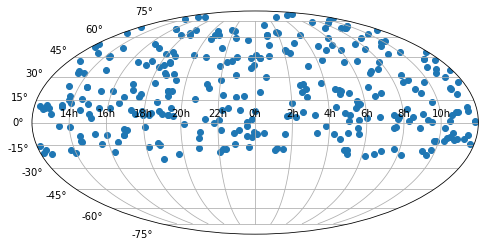

In [124]:
from astropy.coordinates import SkyCoord

ra = Angle(cat['_RA'])
de = Angle(cat['_DE'])
ra = ra.wrap_at('180d')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.rad, de.rad)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [125]:
cat.info

<Table length=324>
    name     dtype   unit   format                             description                             n_bad
----------- ------- ------ ------- ------------------------------------------------------------------- -----
        Seq   int16                                                                  Sequential number     0
         ID   str11                                                                   ID (JHHMMm+DDmA)     0
         GJ    str6                                                                            GJ name     0
       Name   str23                                                                               Name     0
     SpType    str4                                                                   MK spectral type     0
       Jmag float32    mag {:5.2f}                                                         J magnitude     0
       Mass float32   Msun {:5.2f}                                                                Mass     0


## Quick access to data from the Gaia catalog

The library we will use to get Gaia data is [Astroquery](https://astroquery.readthedocs.io/en/latest/). Astroquery provides `Gaia`, which is an [object that represents a connection to the Gaia database](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html).

We can connect to the Gaia database like this:

In [126]:
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = -1

## Direct query with `astroquery` function

First we will use the `Gaia.query_object_async` function, which easily connects to the Gaia catalog. Although it does not give extensive functionality to filter the query, it is a first step.

In [127]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

To do a basic query on the *Gaia* catalogue we just need a pointing centre and the (width, height), or the radius, of the region of interest. This is a clear case where you could build a python function to retrieve data based only on those four parameters.

Here we also include the Jupyter Magic `%time` that will report the execution time of a particular line of code to run. The Magic `%%time` could also be used to report the execution time of the whole cell.

In [145]:
ra0 = 130.025
de0 = 19.98333
w = 3
h = 2

# Define the region to query
center_coord = SkyCoord(ra=ra0, dec=de0, unit=(u.degree, u.degree), frame='icrs')
width_deg = u.Quantity(w, u.deg)
height_deg = u.Quantity(h, u.deg)

# Run the actual query to the catalogue
%time data0 = Gaia.query_object_async(coordinate=center_coord, width=width_deg, height=height_deg)

INFO: Query finished. [astroquery.utils.tap.core]
CPU times: user 10.2 s, sys: 114 ms, total: 10.3 s
Wall time: 19.5 s


In [146]:
data0

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,0.42735110852786373,0.14423369016443197,2.9629078,-2.6048293840171

# Conclusion. In future episodes...

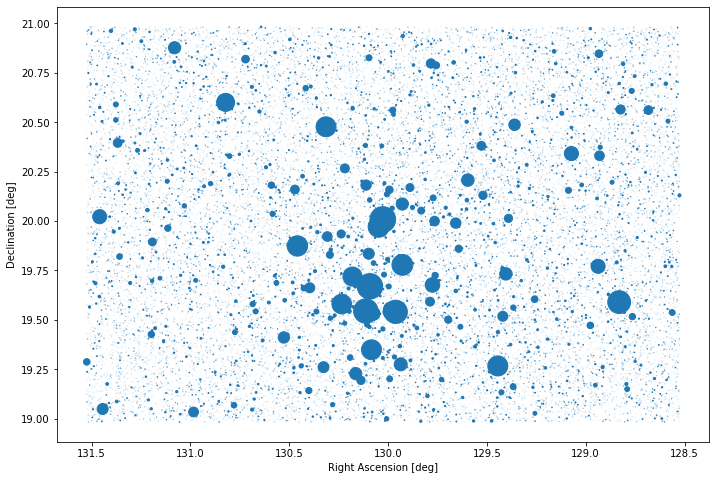

In [147]:
fig, ax = plt.subplots(ncols=1, figsize=(14,8))
ax.scatter(data0['ra'], data0['dec'], s=data0['phot_g_mean_flux']/1e5);
ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');


In [154]:
data[['ra', 'dec']].write('data0.ecsv', format='ascii.ecsv', overwrite=True)

In [155]:
data[['ra', 'dec']].write('data0.csv', format='ascii.csv', overwrite=True)